In questo notebook è contenuto parte del lavoro di tirocinio  e tesi di Giorgio Olivieri per il corso di laurea magistrale in Ingegneria Gestionale "Digitalizzazione e analisi dell'informazione aziendale " UNIVPM

Di seguito si riportano le varie fasi dell'analisi di alcuni dei  dataset indicati nei vari documenti.

**CARICAMENTO DEI DATI**

In questa prima parte i dataset vengono letti.Questi sono stati caricati nel Drive personale di google: per leggerli è necessario eseguire la seconda cella in modo da effettuare il montaggio del drive. In questo modo Colab potrà direttamente avere accesso

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#serve per effettuare il montaggio di google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#inizio a leggere i vari dataset

#dal  dataset reperibile al link: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
p1gd = pd.read_csv('/content/drive/MyDrive/DatasetTesiTirocinio/Plant_1_Generation_Data.csv') #plant1 generation data
p1wd = pd.read_csv('/content/drive/MyDrive/DatasetTesiTirocinio/Plant_1_Weather_Sensor_Data.csv') #plant1 weather data



**ANALISI ESPLORATIVA**

In questa fase i dati vengono esploarati tramite varie tecniche di visualizzazione al fine da comprenderne meglio la struttura

Per ogni dataset esploriamo velocemente la struttura con i metodi  head()  e describe() per vedere velocemnte le feature, il loro tipo e alcune metriche

Per il dataset relativo ai dati di energia generata

In [ ]:
p1gd.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [ ]:
p1gd.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

Per i dati relativi alle condizioni ambientali

In [ ]:
p1wd.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [ ]:
p1wd.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

Vedo qualche informazione sulla distribuzione dei dati dell'energia generata

In [ ]:
#sfrutto le librerie di visualizzazione per avere varie informazioni
plt.figure(figsize=(12, 6))
sns.pairplot(data=p1gd.drop(['PLANT_ID'], axis = 1))
plt.title('Pairplot delle  features ')

Text(0.5, 1.0, 'Pairplot delle  features ')

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Coefficiente di correlazione tra le feautures ')

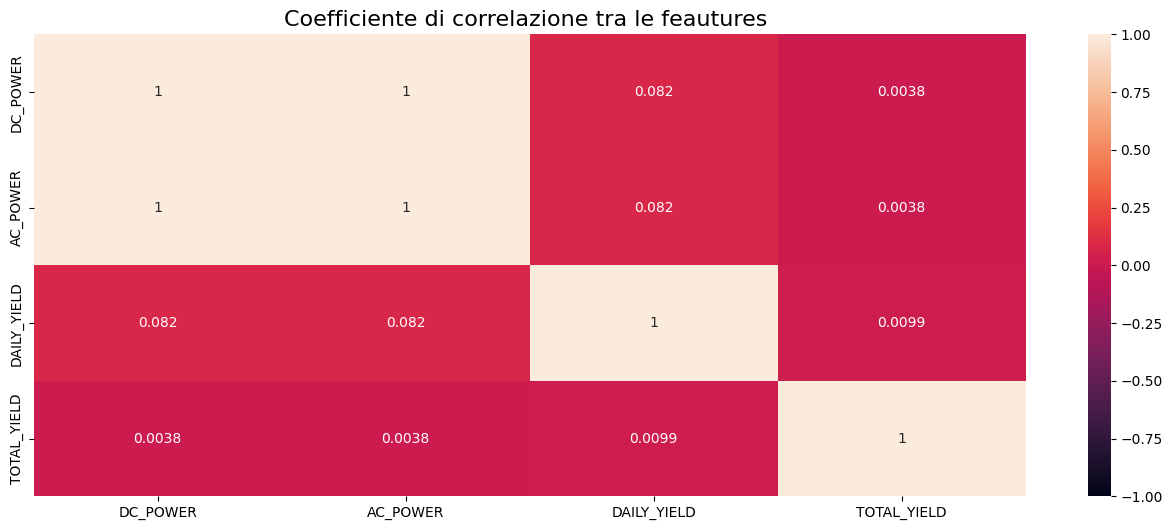

In [ ]:
#uso direttamente correlation di pandas e una heatmap per visualizzare i risultati della correlazione tra le features

#devo prima considerare solo le feature con valori continui
p1gd_cor=p1gd.drop(['DATE_TIME','SOURCE_KEY'], axis = 1)

correlation = p1gd_cor.drop(['PLANT_ID'], axis = 1).corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Coefficiente di correlazione tra le feautures ', size=16)

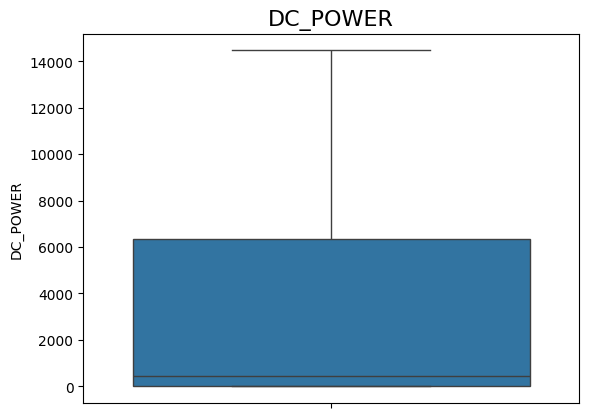

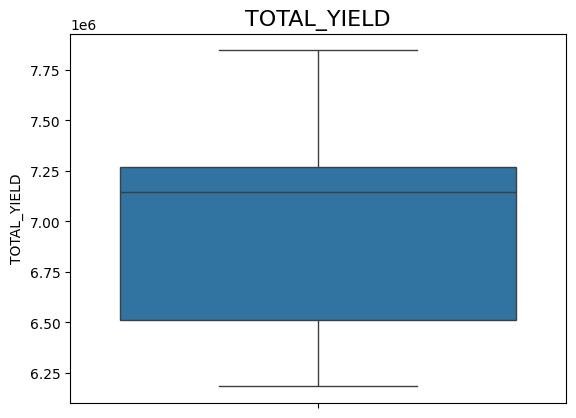

In [ ]:
#boxplot delle feature lo faccio con ciclo for per motivi grafici

for col in p1gd_cor.columns:
    if col != 'PLANT_ID':  #questo perchè non mi interessa la distribuzione di questo tipo di dato
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(p1gd_cor[col])
       plt.title(col, size=16)
       plt.show()

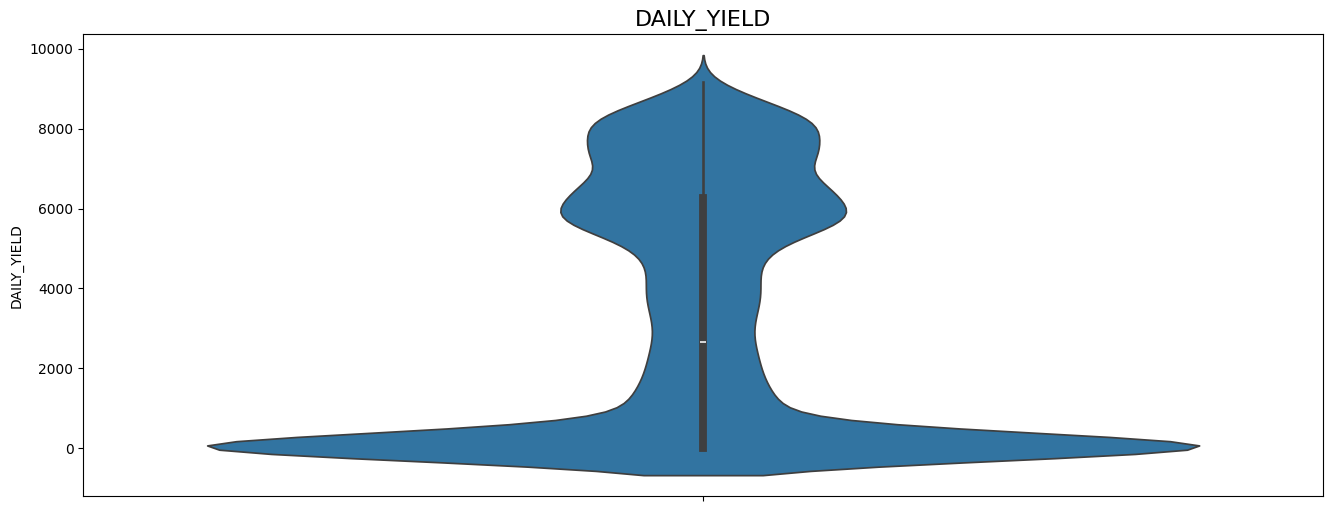

In [ ]:
#grafico a violino, che è un miglioramento del boxplot, con ciclo for per motivi grafici

for col in p1gd_cor.columns:
    if col != 'PLANT_ID':
        plt.figure(figsize=(16, 6))
        sns.violinplot(p1gd_cor[col])
        plt.title(col, size=16)
        plt.show()

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

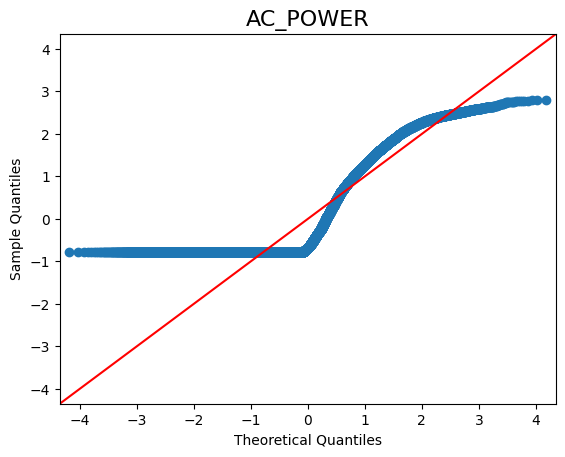

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [ ]:
#vediamo se la distribuzione dei valori delle feautures può essere assimilabile ad un gaussiana

for col in p1gd_cor.columns:
    if col != 'PLANT_ID':
        plt.figure(figsize=(16, 6))
        sm.qqplot(p1gd_cor[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

vediamo alcune informazioni in base ai singoli inverter dell'impianto che sono identificati dalla colonna SOURCE_KEY

In [ ]:
pg1_inverters=p1gd['SOURCE_KEY'].nunique()
print(f"L'impianto  ha  {pg1_inverters} inverter.")


L'impianto  ha  22 inverter.


In [ ]:
#la media di potenza in ac per pgni inverter considerando intero periodo di rilevamento
print(f"Media di potenza in AC per ogni inverter")
ax=sns.barplot(data=p1gd,x='SOURCE_KEY',y='AC_POWER',color='green',errorbar=None)

plt.xticks([])
ax.set(ylabel='Media potenza generate in  AC (kW)')
plt.show()

Media di potenza in AC per ogni inverter


In [ ]:
dc_gen=p1gd.copy()

dc_gen['DATE_TIME'] = pd.to_datetime(dc_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')

dc_gen['time']=dc_gen['DATE_TIME'].dt.time

dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Set2", n_colors=12)

#li divido a metà per questioni grafiche e di legggibilità
fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('')
plt.show()

<Axes: xlabel='time'>

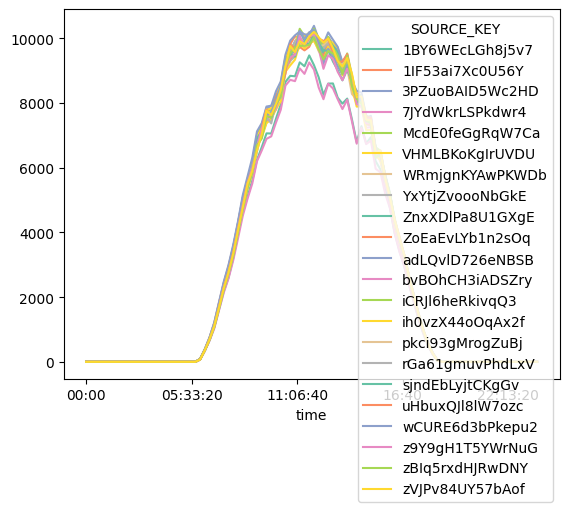

In [ ]:
#se le lascio tutte insieme
cmap = sns.color_palette("Set2", n_colors=23)
dc_gen.plot(color=cmap)

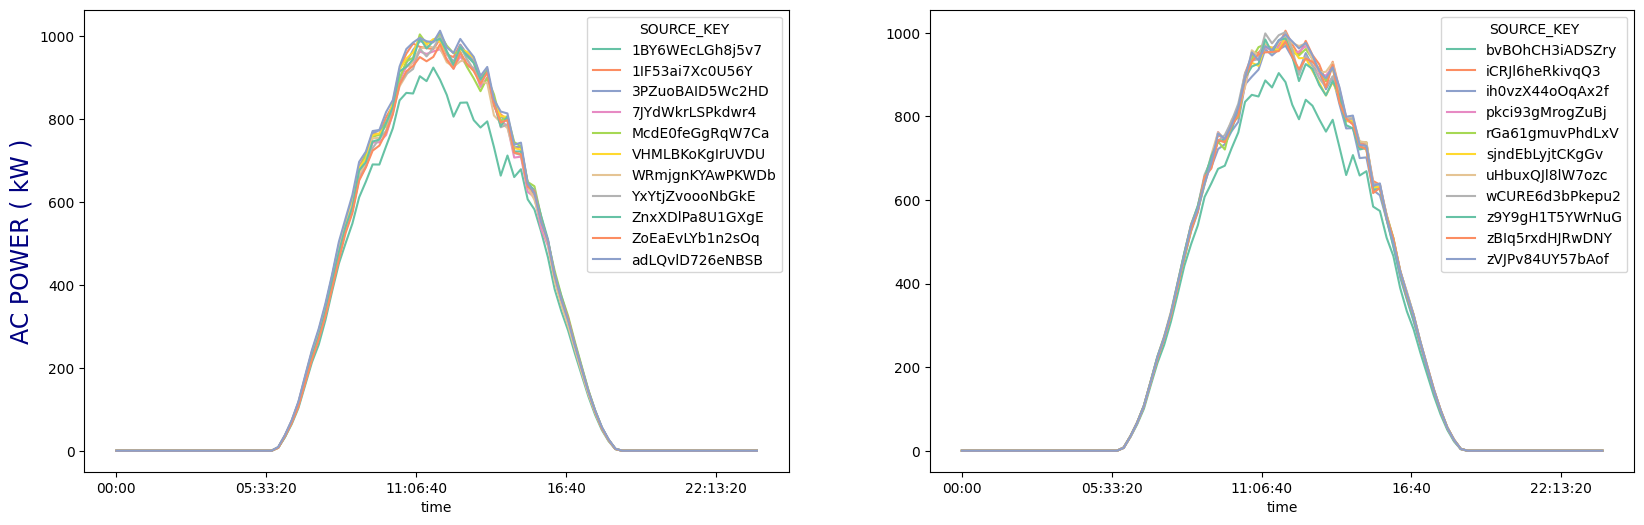

In [ ]:
from re import A
ac_gen=p1gd.copy()

ac_gen['DATE_TIME'] = pd.to_datetime(ac_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')

ac_gen['time']=ac_gen['DATE_TIME'].dt.time

ac_gen=ac_gen.groupby(['time','SOURCE_KEY'])['AC_POWER'].mean().unstack()

cmap = sns.color_palette("Set2", n_colors=12)

#li divido a metà per questioni grafiche e di legggibilità
fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
ac_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
ac_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('')
ax[0].set_ylabel('AC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('')
plt.show()

In [ ]:
#se le lascio tutte insieme
cmap = sns.color_palette("Set2", n_colors=23)
ac_gen.plot(color=cmap)

<Axes: xlabel='time'>

In [ ]:
df=(p1gd.groupby('SOURCE_KEY').AC_POWER.sum()/p1gd.groupby('SOURCE_KEY').DC_POWER.sum())*1000
plt.plot(df)
plt.xticks(df.index,rotation=90)
plt.title(' % di DC Power convertita in AC Power per ogni inverter')
plt.show()

Allo stesso modo vedo  qualche informazione sulla distribuzione dei dati delle condizioni metereologiche

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=p1wd)
plt.title('Pairplot delle  features ')

Text(0.5, 1.0, 'Pairplot delle  features ')

<Figure size 1200x600 with 0 Axes>

In [ ]:
p1wd_cor=p1wd.drop(['DATE_TIME','SOURCE_KEY','PLANT_ID'], axis = 1)

correlation = p1wd_cor.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Coefficiente di correlazione tra le feautures ', size=16)

Text(0.5, 1.0, 'Coefficiente di correlazione tra le feautures ')

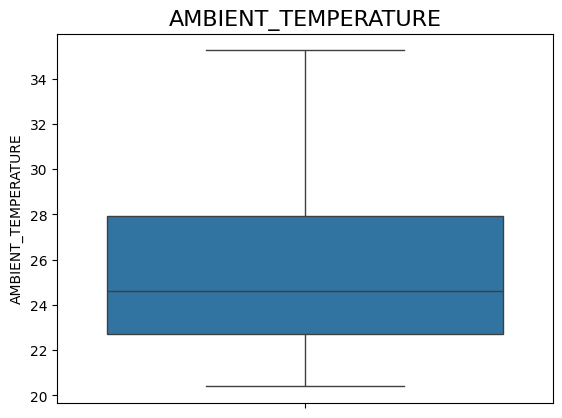

In [ ]:
#boxplot

for col in p1wd_cor.columns:
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(p1wd_cor[col])
       plt.title(col, size=16)
       plt.show()

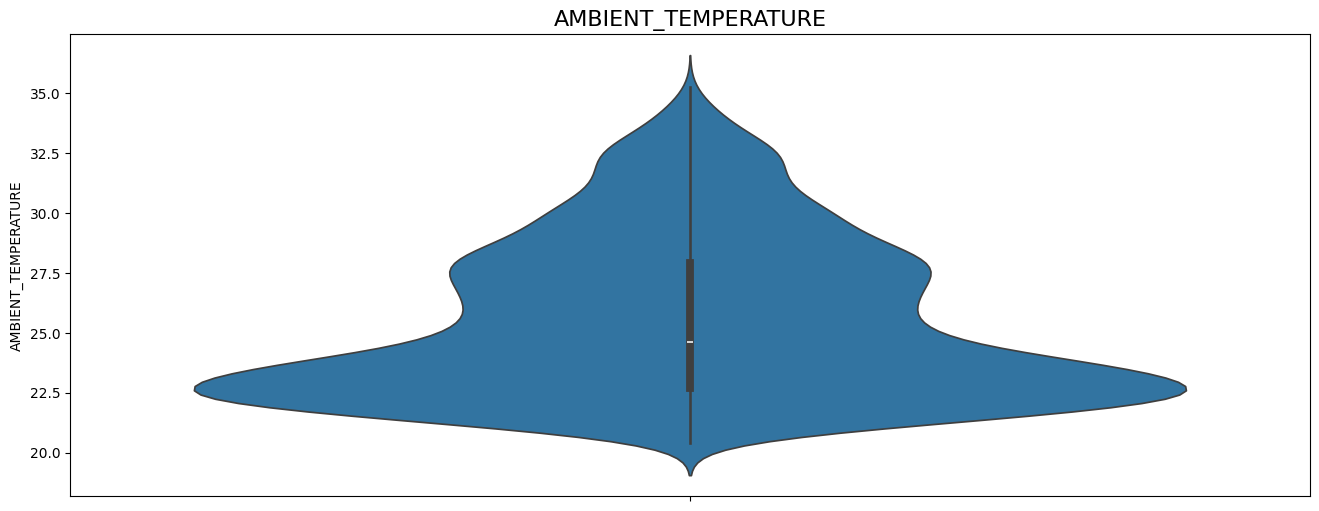

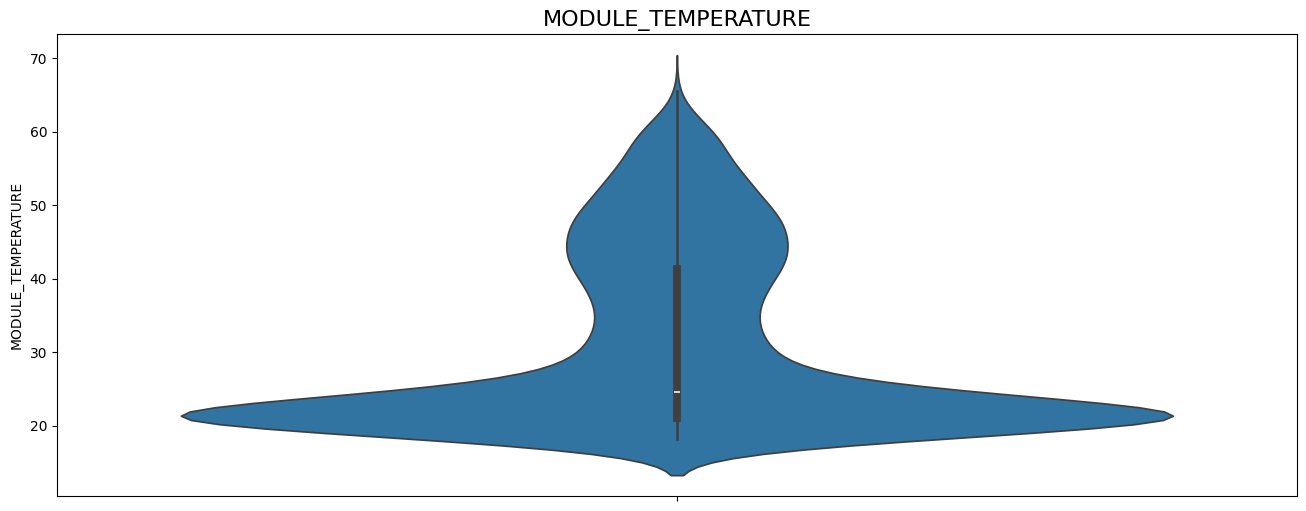

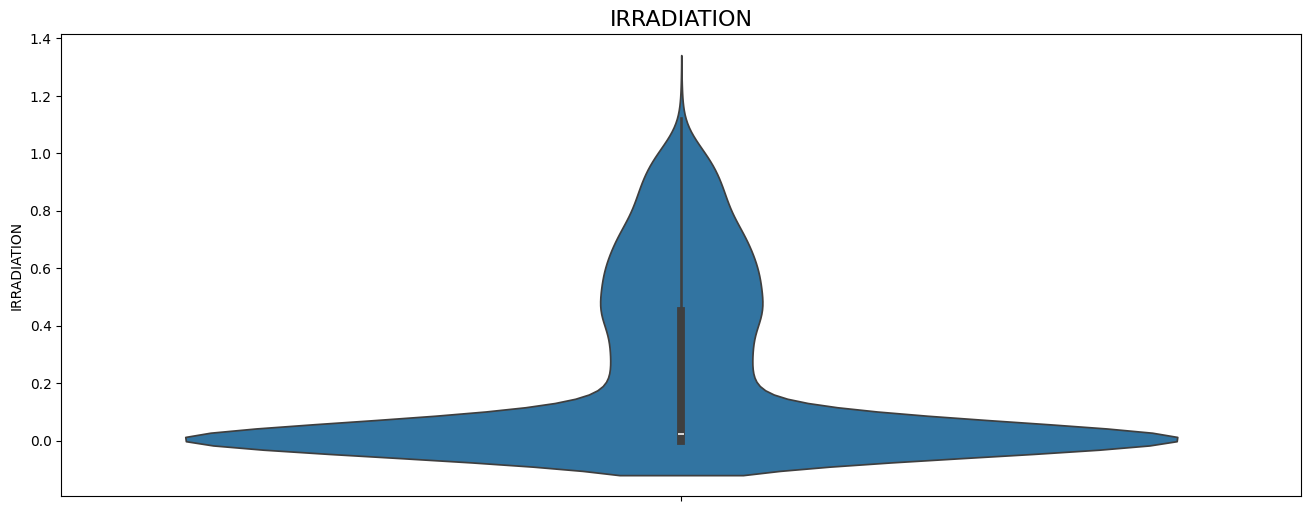

In [ ]:
#grafico a violino
for col in p1wd_cor.columns:
        plt.figure(figsize=(16, 6))
        sns.violinplot(p1wd_cor[col])
        plt.title(col, size=16)
        plt.show()

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

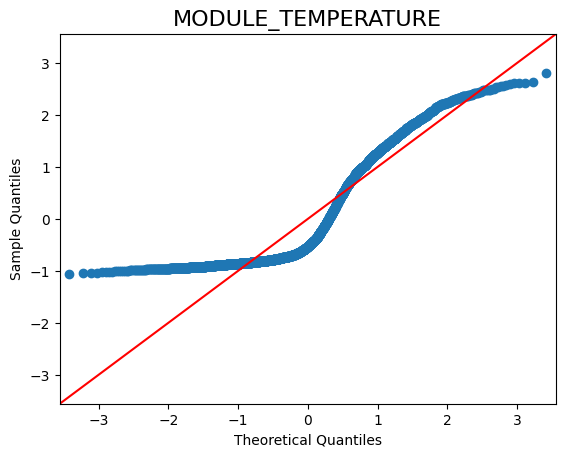

<Figure size 1600x600 with 0 Axes>

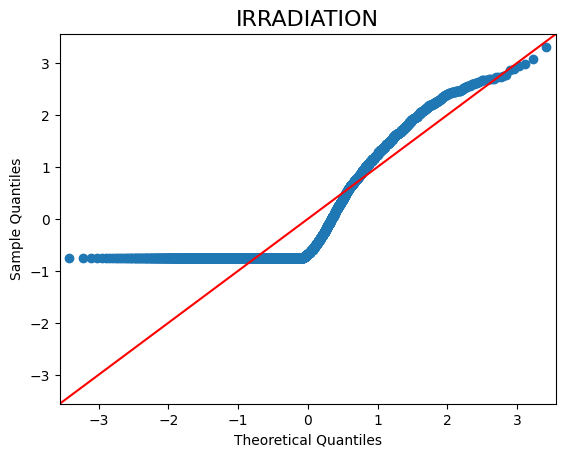

In [ ]:
#vediamo se assimilabile a gaussiana
for col in p1wd_cor.columns:
        plt.figure(figsize=(16, 6))
        sm.qqplot(p1wd_cor[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

Ora posso fare il merge dei dati, cioè unire i due dataset relativi al meteo e all'energia prodotta  al fine di averne uno solo sfruttando il fatto che i campi DATE_TIME e PLANT_ID sono gli stessi.

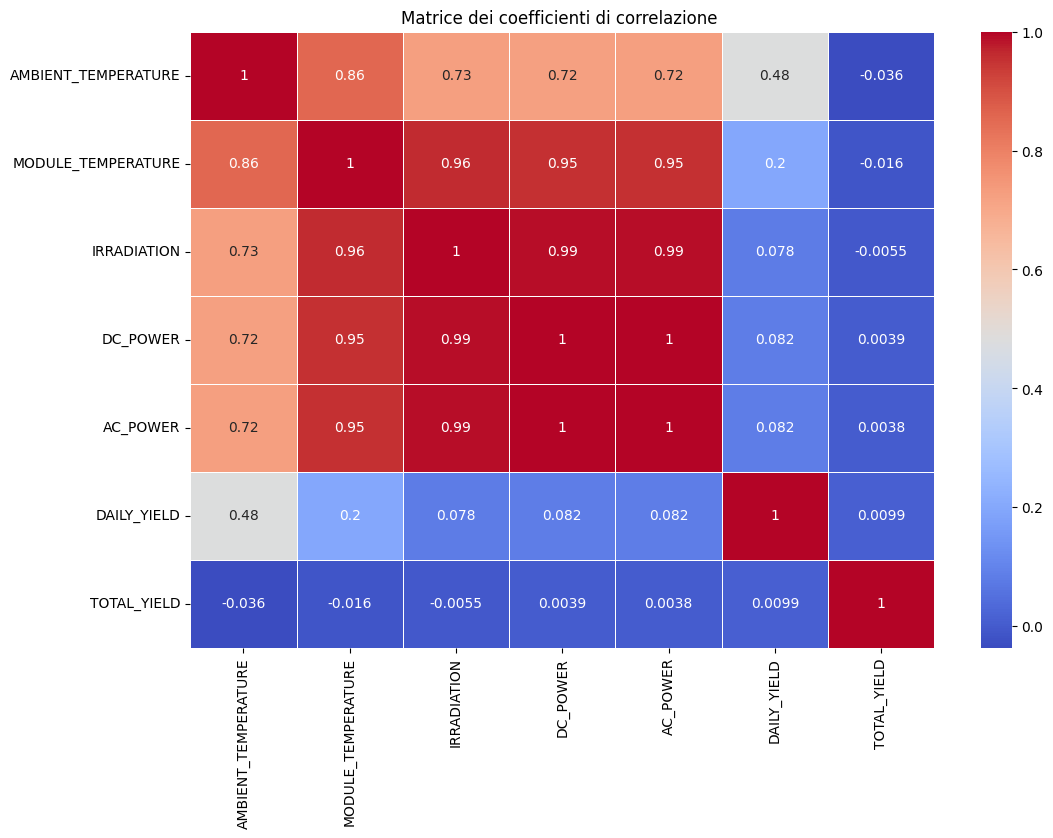

In [4]:
p1wd['DATE_TIME'] = pd.to_datetime(p1wd['DATE_TIME'])
p1gd['DATE_TIME'] = pd.to_datetime(p1gd['DATE_TIME'], format='%d-%m-%Y %H:%M')

merged_data = pd.merge(p1wd, p1gd, on=['DATE_TIME', 'PLANT_ID'])  #unisco i dataset su queste colonne
numeric_columns = merged_data.select_dtypes(include=[np.number])  #qui riprendo solo  i valori numerici, per cui non considera source_key che è la stringa id dell'inverter

#definisco e plotto la matrice di correlazione
correlation_matrix = numeric_columns.drop(['PLANT_ID'], axis = 1).corr() #tolgo  dalla tabella il plant_id che tanto non serve per la correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice dei coefficienti di correlazione ')
plt.show()

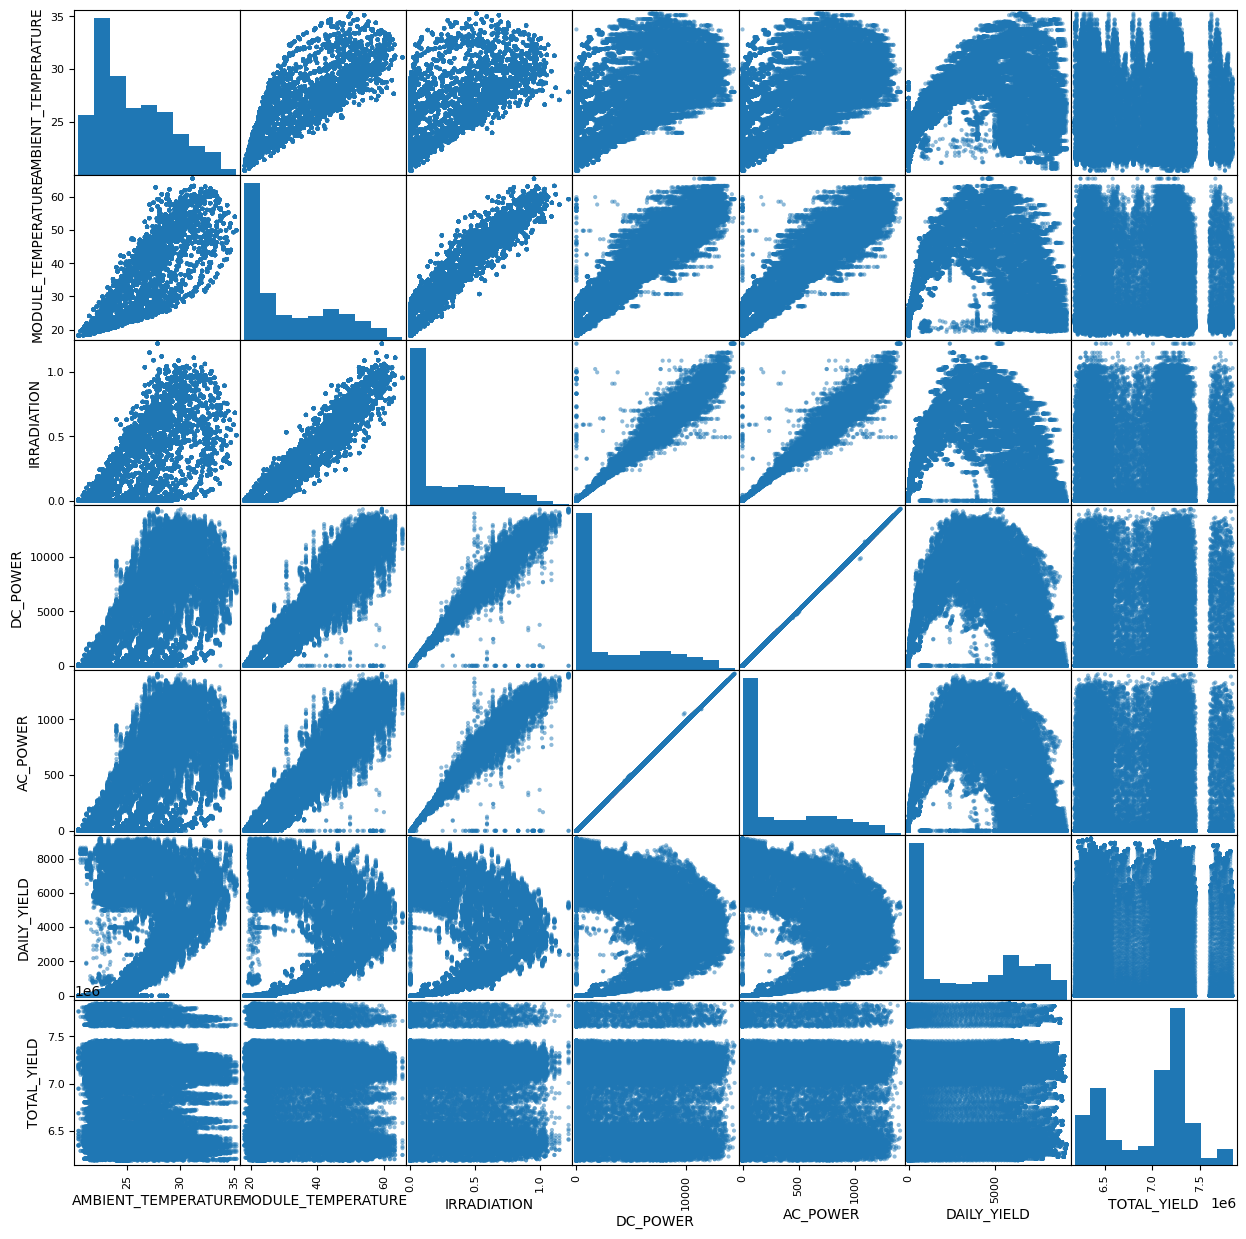

In [ ]:
#faccio la stessa cosa ma differente a livello grafico
pd.plotting.scatter_matrix(numeric_columns.drop(['PLANT_ID'], axis = 1), figsize=(15,15))
plt.show()

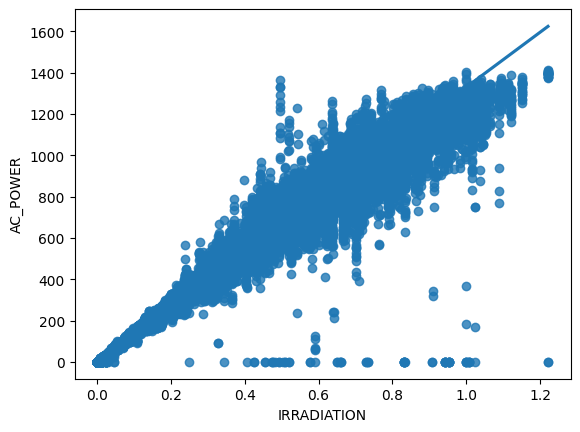

In [ ]:
ax = sns.regplot(x='IRRADIATION', y='AC_POWER', data=numeric_columns, robust=True)

In [ ]:
ax = sns.regplot(x='MODULE_TEMPERATURE', y='AC_POWER', data=numeric_columns, robust=True)

In [ ]:
ax = sns.regplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=numeric_columns, robust=True)

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=numeric_columns.drop(['PLANT_ID'], axis = 1))
plt.title('Pairplot delle  features ')

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


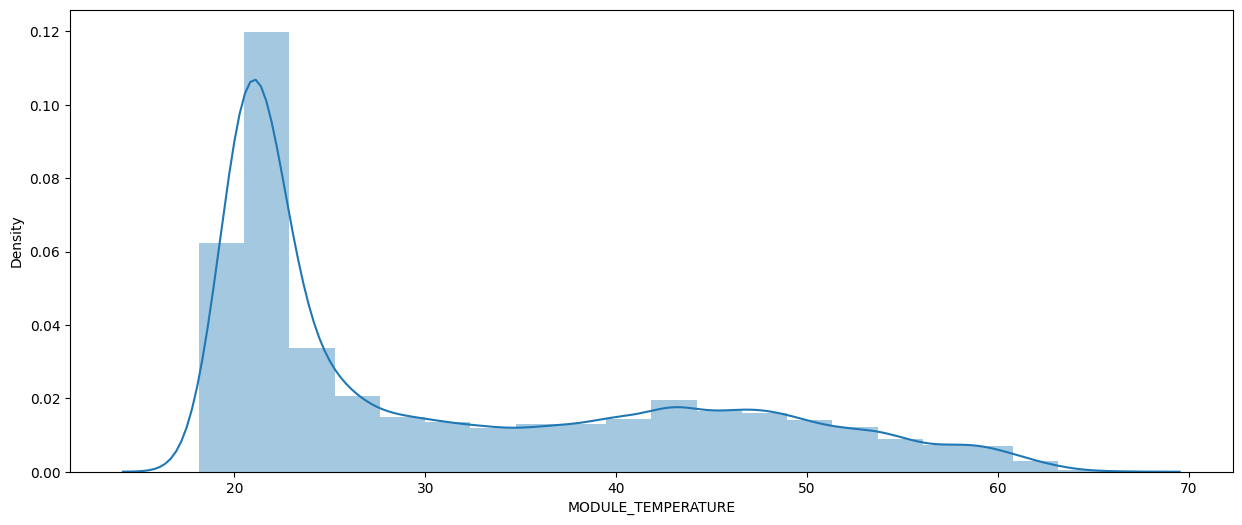

<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


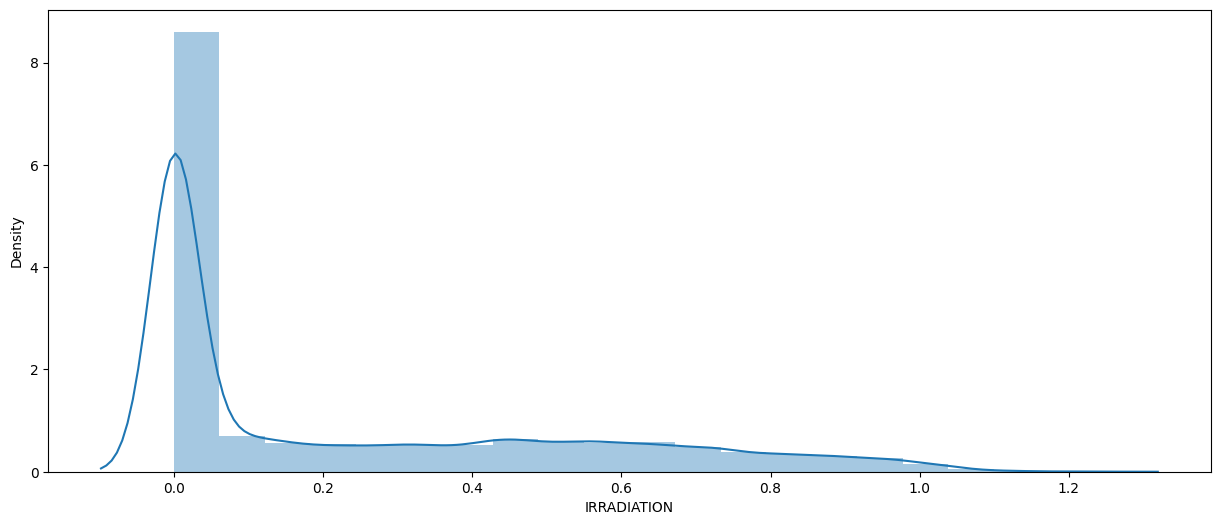

<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


<ipython-input-4-4fb423387e80>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continous[i], bins = 20, kde = True)


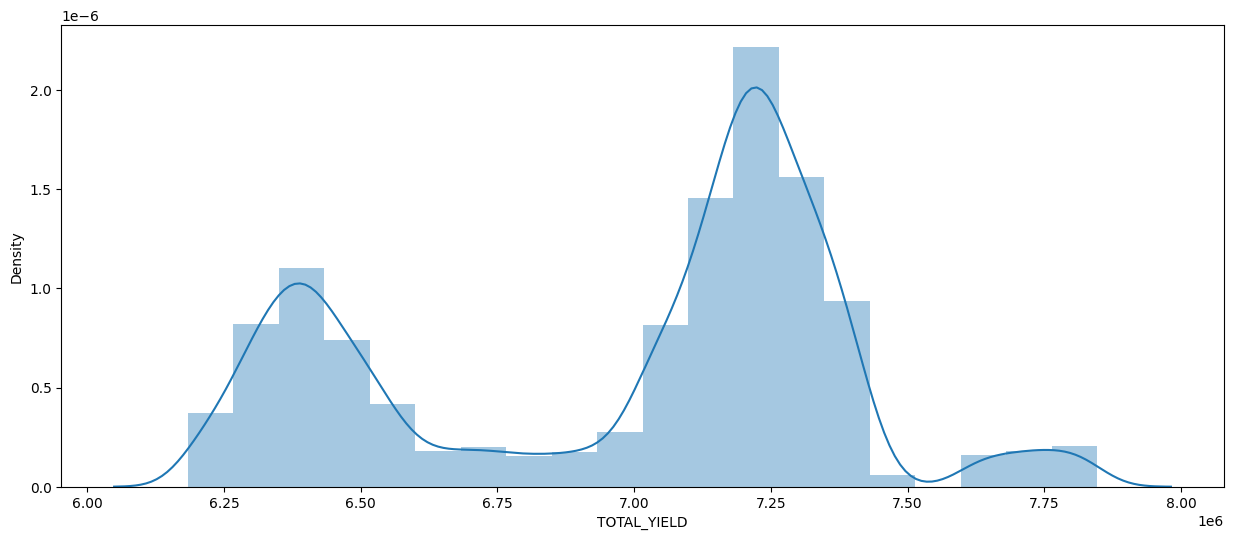

In [ ]:
#vediamo la densità di distribuzione

continous=numeric_columns.drop(['PLANT_ID'], axis = 1) #non mi interessa questa feauture

for i in continous:
    plt.figure(figsize=(15,6))
    sns.distplot(continous[i], bins = 20, kde = True)
    plt.show()

Serie temporali

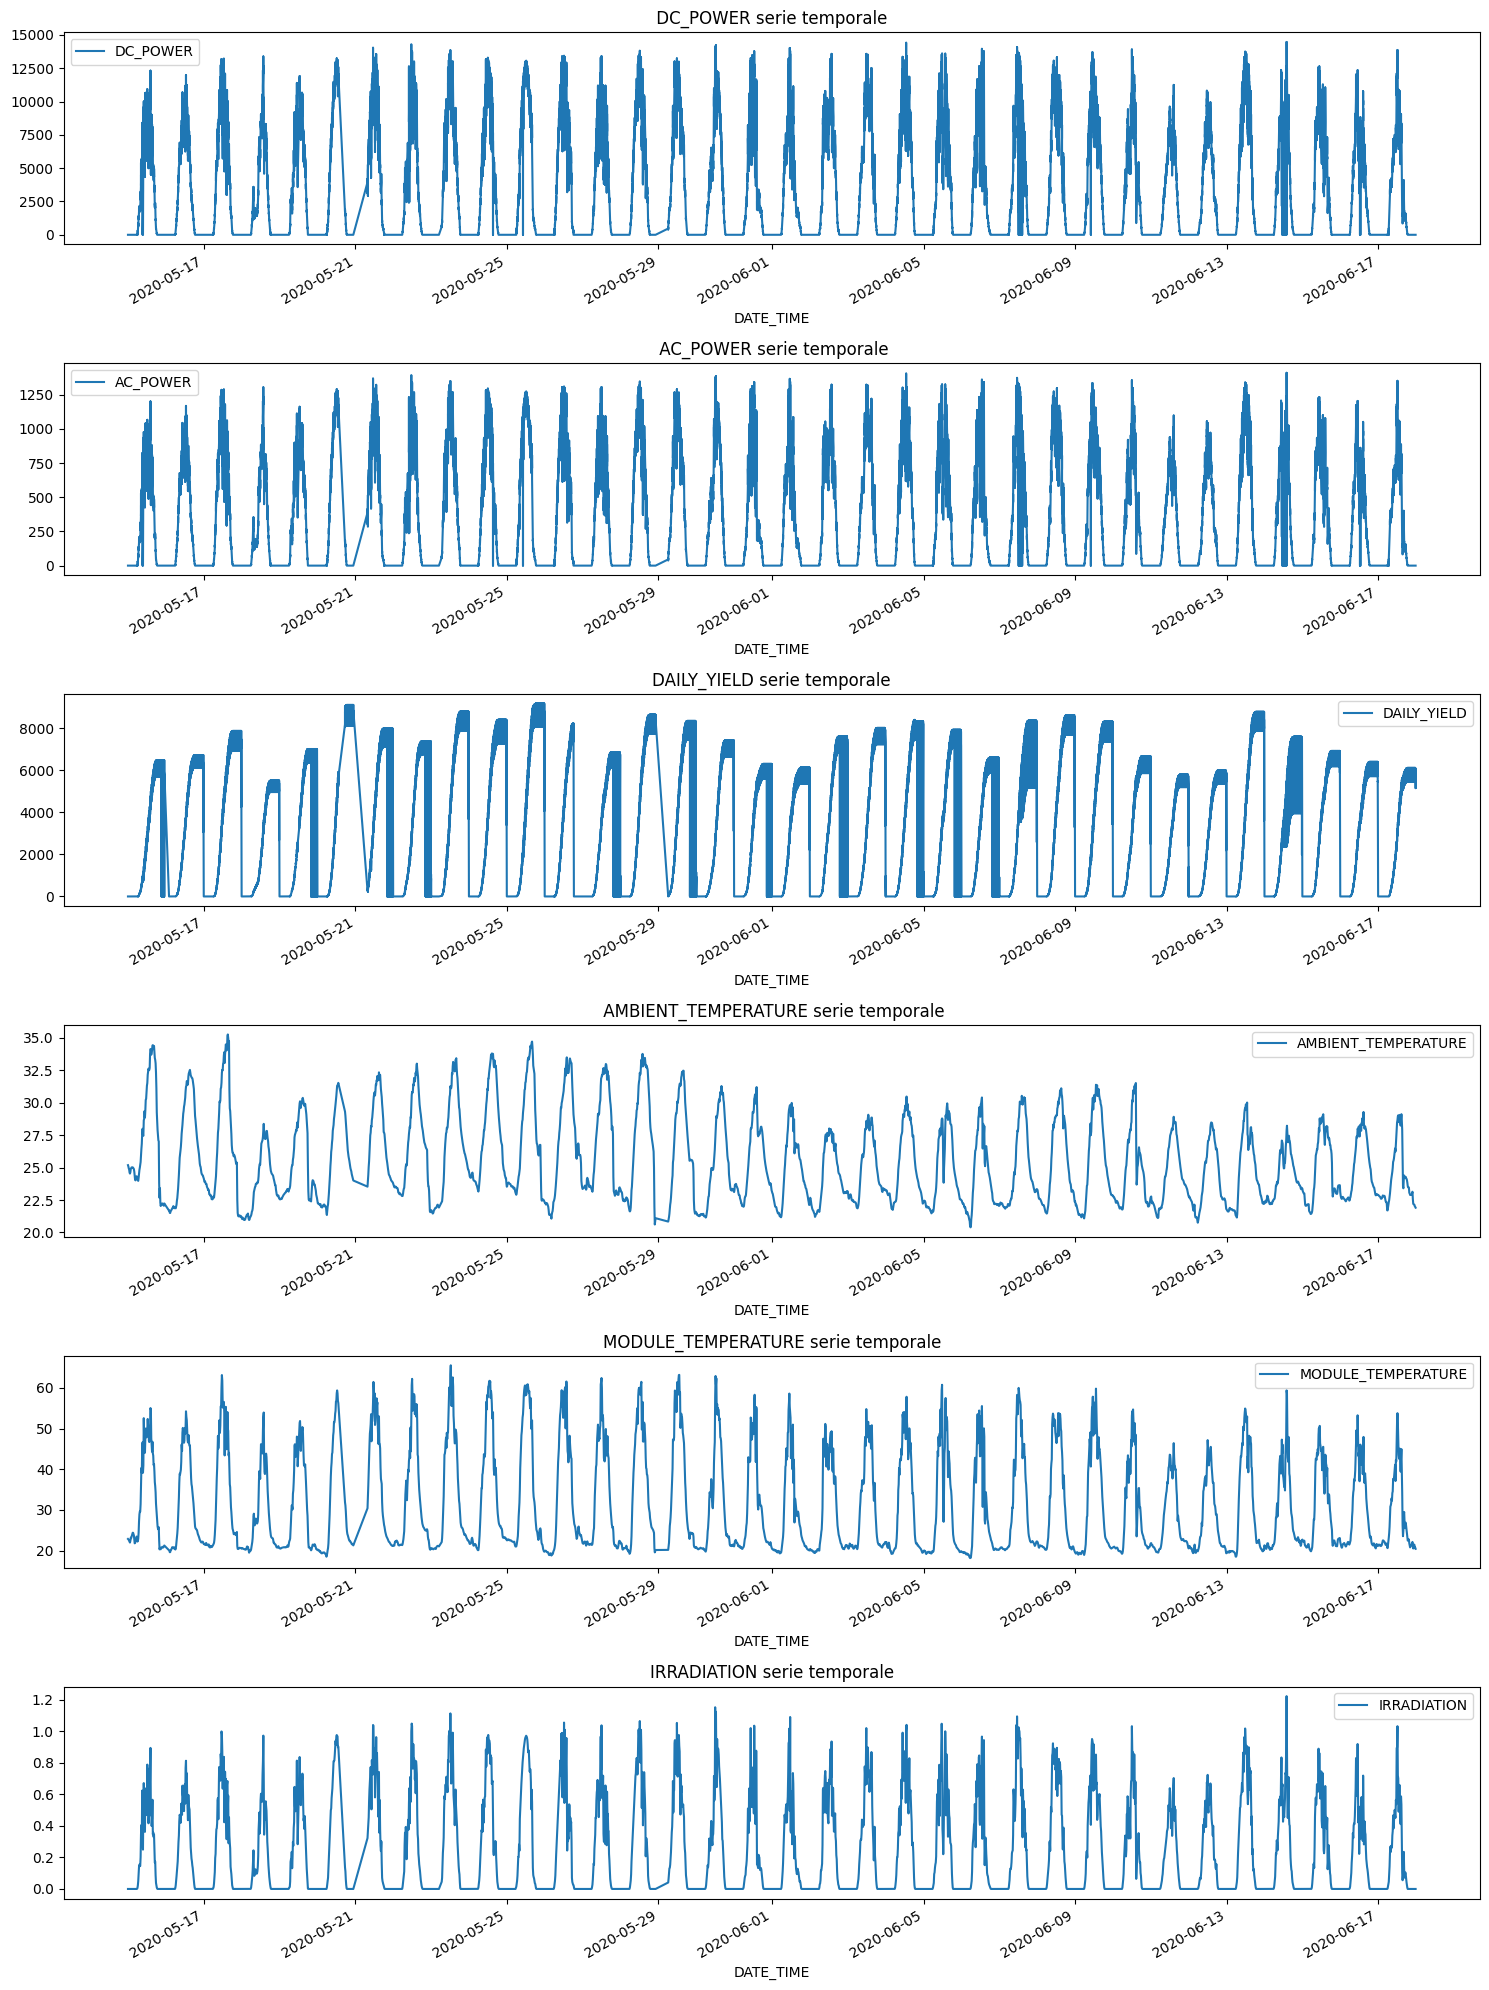

In [ ]:
#vediamo le serie temporali delle features

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))
merged_data.plot(x='DATE_TIME', y='DC_POWER', ax=axes[0], title=" DC_POWER serie temporale ")
merged_data.plot(x='DATE_TIME', y='AC_POWER', ax=axes[1], title=" AC_POWER serie temporale")
merged_data.plot(x='DATE_TIME', y='DAILY_YIELD', ax=axes[2], title="DAILY_YIELD serie temporale")
merged_data.plot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', ax=axes[3], title=" AMBIENT_TEMPERATURE serie temporale")
merged_data.plot(x='DATE_TIME', y='MODULE_TEMPERATURE', ax=axes[4], title="MODULE_TEMPERATURE serie temporale")
merged_data.plot(x='DATE_TIME', y='IRRADIATION', ax=axes[5], title="IRRADIATION serie temporale")
plt.tight_layout()
plt.show()

In [5]:
merged_data['DATE_TIME'] = pd.to_datetime(merged_data['DATE_TIME'], format='%d-%m-%Y %H:%M')

merged_data['day_hours'] = merged_data['DATE_TIME'].dt.hour
merged_data.head()
#seasonal_trends = merged_data.groupby(merged_data.DATE_TIME.month).mean()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  AMBIENT_TEMPERATURE  \
0 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   
2 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   
3 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   
4 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION     SOURCE_KEY_y  DC_POWER  AC_POWER  \
0           22.857507          0.0  1BY6WEcLGh8j5v7       0.0       0.0   
1           22.857507          0.0  1IF53ai7Xc0U56Y       0.0       0.0   
2           22.857507          0.0  3PZuoBAID5Wc2HD       0.0       0.0   
3           22.857507          0.0  7JYdWkrLSPkdwr4       0.0       0.0   
4           22.857507          0.0  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  day_hours  
0          0.0    6259559.0          0  
1          0.0    6183645.0          0  
2          0.0    6987759.0          0  
3          0.0    7602960.0          0  
4          0.0    7158964.0          0

Text(0.5, 1.0, 'boxplot AC Power generata nelle varie ore del giorno')

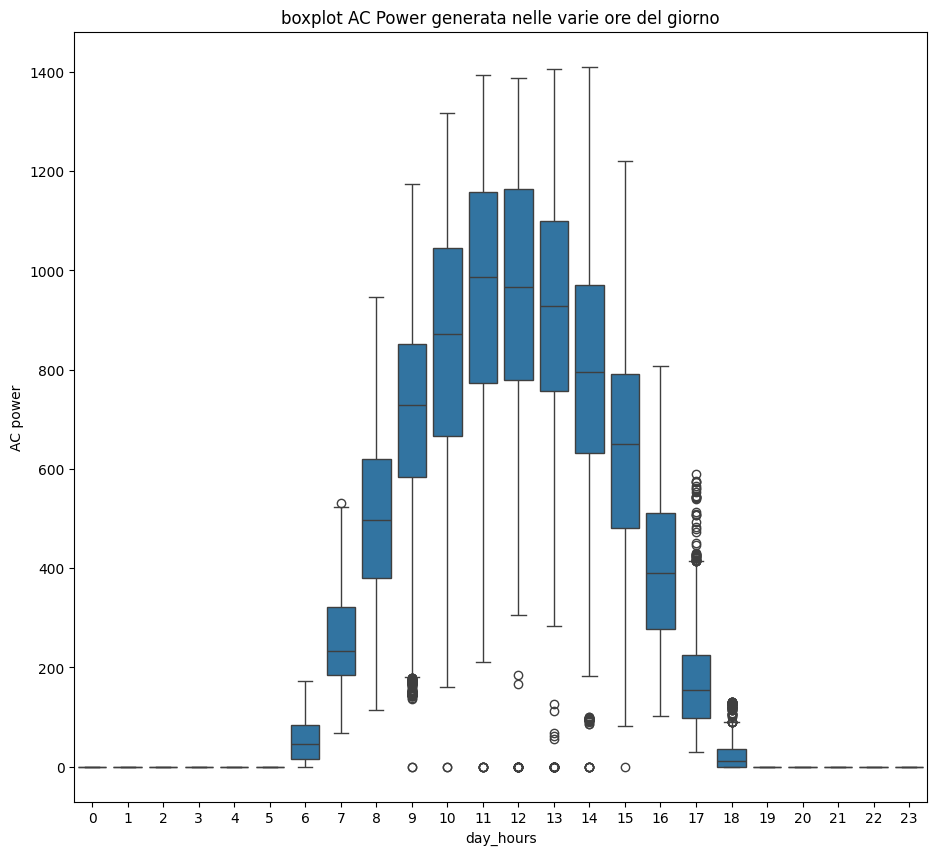

In [ ]:
#vediamo la distribuzione dell'energia generata nelle varie ore del giorno
fig, ax = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=merged_data, x='day_hours', y='AC_POWER', ax=ax)
ax.set_ylabel('AC power')
ax.set_title('boxplot AC Power generata nelle varie ore del giorno')

In [ ]:
#su questa variabile salvo i dati aggregati sulla media
mean_day_hours = merged_data.groupby('day_hours')['AC_POWER'].mean()

#li plotto con le boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=merged_data, x='day_hours', y='AC_POWER', ax=ax)
mean_day_hours.plot(ax=ax,color='red')
ax.set_title('Media AC power nelle varie ore del giorno')
ax.set_xlabel('day_hours')
ax.set_ylabel('Average AC power Values')
plt.grid(True)
plt.show()


vediamo nel tempo AC e DC power nel corso di una giornata

In [ ]:
p=p1gd.copy() #per non sporcare analisi successive uso questa variabile di appoggio
p.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0

In [ ]:

p['date'] = p['DATE_TIME'].dt.date
p['time'] = p['DATE_TIME'].dt.time

In [ ]:
dc = p.groupby('time')['DC_POWER'].sum()
ac = p.groupby('time')['AC_POWER'].sum()

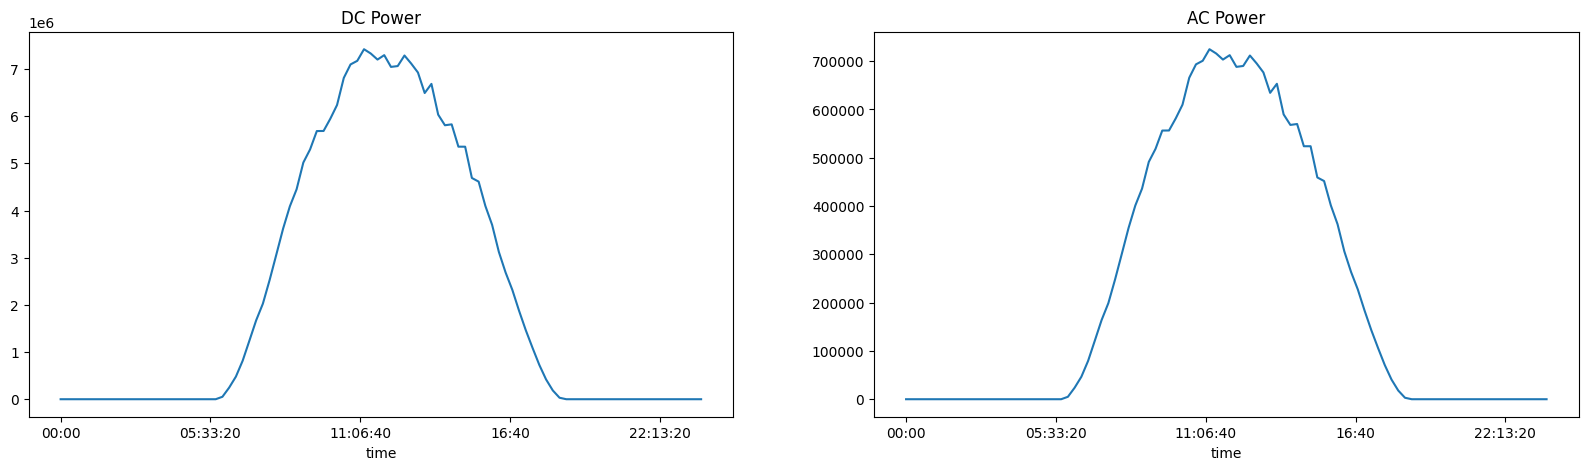

In [ ]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(20, 5))
dc.plot(ax=ax[0])
ac.plot(ax=ax[1])

ax[0].set_title('DC Power')
ax[1].set_title('AC Power')
plt.show()

Ora vediamo la resa dell'impinato nel periodo considerato, pertanto si plottano i dati senza fare alcuna predizione.

In [ ]:
#vedo la % di conversione di enrgia da DC ad Ac valutando la perdita

losses=p1gd.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum(numeric_only=True) #dentro sum() uso questa specifica per evitare errore a runtime sul tipo di dato
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*1000

losses['losses'].plot(style='o--',figsize=(17,5),label='Potenza effettiva')

plt.title('% di potenza DC convertita in corrente alternata AC',size=17)
plt.ylabel('Potenza DC  convertita (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='Media')
plt.legend()
plt.show()

**PRE-PROCESSING**


Rivedo la struttura dei dati

In [ ]:
numeric_columns.head()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  DC_POWER  \
0   4135001            25.184316           22.857507          0.0       0.0   
1   4135001            25.184316           22.857507          0.0       0.0   
2   4135001            25.184316           22.857507          0.0       0.0   
3   4135001            25.184316           22.857507          0.0       0.0   
4   4135001            25.184316           22.857507          0.0       0.0   

   AC_POWER  DAILY_YIELD  TOTAL_YIELD  
0       0.0          0.0    6259559.0  
1       0.0          0.0    6183645.0  
2       0.0          0.0    6987759.0  
3       0.0          0.0    7602960.0  
4       0.0          0.0    7158964.0

Preparo i dati separando le features dipendendi da quelle indipendenti e poi faccio la divisione del dataset in training e test set

In [6]:
from sklearn.model_selection import train_test_split
#separazione delle feature dal terget
X = numeric_columns.drop(['AC_POWER','PLANT_ID','DC_POWER','MODULE_TEMPERATURE','DAILY_YIELD','TOTAL_YIELD'], axis = 1)  #tolgo AC che è il target e poi plant_id che non serve e DC power perchè è perfettamente correlato con AC
y = numeric_columns['AC_POWER'] #il target da predirre
#divisione del dataset in traing e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(X)


       AMBIENT_TEMPERATURE  IRRADIATION
0                25.184316          0.0
1                25.184316          0.0
2                25.184316          0.0
3                25.184316          0.0
4                25.184316          0.0
...                    ...          ...
68769            21.909288          0.0
68770            21.909288          0.0
68771            21.909288          0.0
68772            21.909288          0.0
68773            21.909288          0.0

[68774 rows x 2 columns]


**PREDIZIONE**

Vediamo alcuni modelli di regressione  applicati

Modello Partial least squares (PLS)

In [7]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score  #queste sono metriche per valutare il modello

# facciamo il training del modello  PLS
pls = PLSRegression()
pls.fit(X_train, y_train)

# predizione e valutazione dei risultati Predict and evaluate on the test set
y_pred = pls.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
pls_score = pls.score(X_test, y_test)
print(f"Score del modello PLS : {pls_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del modello PLS : 98.0023 %
RMSE: 55.520742919281304
R²: 0.9800229131753128


vediamo la learning curve

Una curva di apprendimento mostra il punteggio di validazione e addestramento di uno stimatore per un numero variabile di campioni di addestramento. È uno strumento per scoprire quanto beneficiamo dall'aggiunta di più dati di addestramento e se lo stimatore soffre maggiormente di un errore di varianza o di un errore di bias

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(pls, X, y,  cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

[ 5501 17881 30260 42639 55019]
[[0.98367737 0.98320539 0.98320539 0.98320539 0.98320539]
 [0.98677707 0.98835355 0.98700731 0.98700731 0.98700731]
 [0.98410501 0.98511811 0.98604661 0.98648804 0.98648804]
 [0.97769331 0.97777763 0.97891325 0.98492549 0.98471609]
 [0.97697669 0.97719215 0.97790964 0.9828836  0.97969713]]
[[0.98573844 0.98369638 0.98271239 0.96213311 0.97617088]
 [0.98616571 0.98434687 0.98270437 0.96276892 0.9751537 ]
 [0.98695513 0.98388039 0.98232894 0.96301215 0.97377308]
 [0.98695271 0.98424095 0.98240241 0.96288843 0.97471009]
 [0.98724192 0.98355679 0.98276266 0.96255888 0.97444571]]


In [ ]:
print(len(X_train)) #numero dati training usato

55019


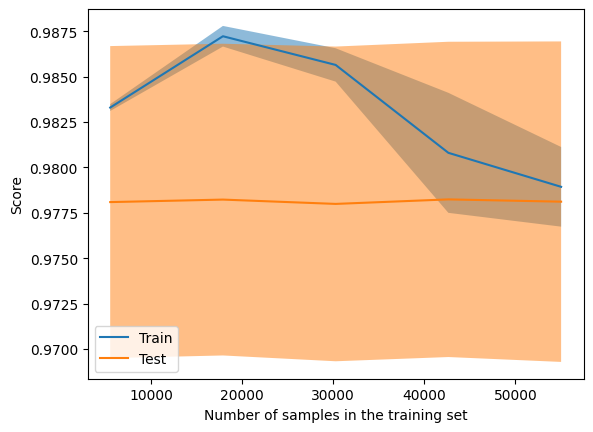

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator( pls, X, y,  cv=5)

vedo che ho usato 55019 dati per il training e questo porta ad ottimi risultati

Vediamo la validation curve

Il modo corretto di scegliere più iperparametri di uno stimatore è ovviamente la ricerca su griglia o metodi simili  che selezionano l'iperparametro con il punteggio massimo su un set di convalida o più set di convalida.  Per ottenere una stima corretta della generalizzazione dobbiamo calcolare il punteggio su un altro set di test.
Tuttavia, a volte è utile tracciare un grafico dell'influenza di un singolo iperparametro sul punteggio di training e sul punteggio di convalida per scoprire se lo stimatore è sovra o sottoadattato per alcuni valori di iperparametro.

Se il punteggio di training e il punteggio di convalida sono entrambi bassi, lo stimatore sarà in undergitting. Se il punteggio di training è alto e il punteggio di convalida è basso, lo stimatore è in overfitting e altrimenti funziona molto bene. Un punteggio di training basso e un punteggio di convalida alto di solito non sono possibili.Con l'ausilio del seguente grafico vediamo questa situazione.

In [ ]:
from sklearn.model_selection import validation_curve
#qui calcola solo  i parametri e volendo posso fare il print
train_scores, valid_scores = validation_curve(pls, X, y, param_name="n_components",param_range=[1,2]) #number of components to keep. Should be in [1, n_features] in questo caso max 2 perchè ho solo 2 features
print(train_scores)
print(valid_scores)

[[0.88871565 0.89344537 0.88771799 0.88956136 0.89014744]
 [0.97697669 0.97719215 0.97790964 0.9828836  0.97969668]]
[[0.86033109 0.81901234 0.91201884 0.90539028 0.89835398]
 [0.98724192 0.98355679 0.98276266 0.96255888 0.97444631]]


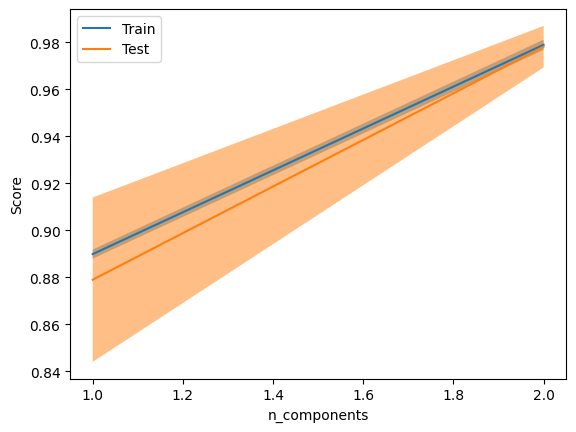

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay
#qui crea proprio il grafico
ValidationCurveDisplay.from_estimator(pls, X, y, param_name="n_components",param_range=[1,2]) #molto sensibile a questo parametro

provo a vedere con un altro parametro


In [ ]:
from sklearn.model_selection import validation_curve
#qui calcola solo  i parametri e volendo posso fare il print
train_scores, valid_scores = validation_curve(pls, X, y, param_name="max_iter",param_range=[1,1000])
print(train_scores)
print(valid_scores)

/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


[[0.97697669 0.97719215 0.97790964 0.9828836  0.97969668]
 [0.97697669 0.97719215 0.97790964 0.9828836  0.97969668]]
[[0.98724192 0.98355679 0.98276266 0.96255888 0.97444631]
 [0.98724192 0.98355679 0.98276266 0.96255888 0.97444631]]


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warn

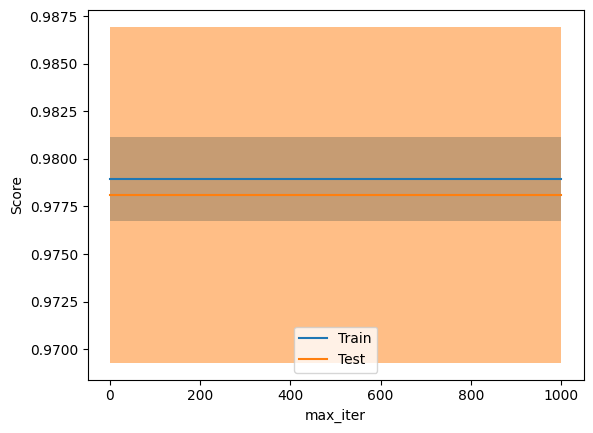

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay
#qui crea proprio il grafico
ValidationCurveDisplay.from_estimator(pls, X, y, param_name="max_iter",param_range=[1,1000])

vedo se cambia molto con uesto parametro (migliora del 3%)

In [ ]:
#uso pls2 per il secondo modello di pls per vedere i risultati con il parametro studiato

pls2 = PLSRegression(n_components=2) #specifica del parametro
pls2.fit(X_train, y_train)


y_pred2 = pls2.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)
pls2_score = pls2.score(X_test, y_test)
print(f"Score del modello PLS : {pls2_score*100:.4f} %")
print(f"RMSE: {rmse2}")
print(f"R²: {r2_2}")

Score del modello PLS : 98.0023 %
RMSE: 55.520742919281304
R²: 0.9800229131753128


miglioramenti ottenuti

In [ ]:
incr=pls2_score-pls_score
incrrmse= rmse-rmse2
print(f"Incremento Score : {incr*100:.4f} %")
print(f"RMSE si abbassa di :{incrrmse}")

Incremento Score : 0.0000 %
RMSE si abbassa di :0.0


valutiamo i risultati (del primo modello , quindi pls e non pls2)

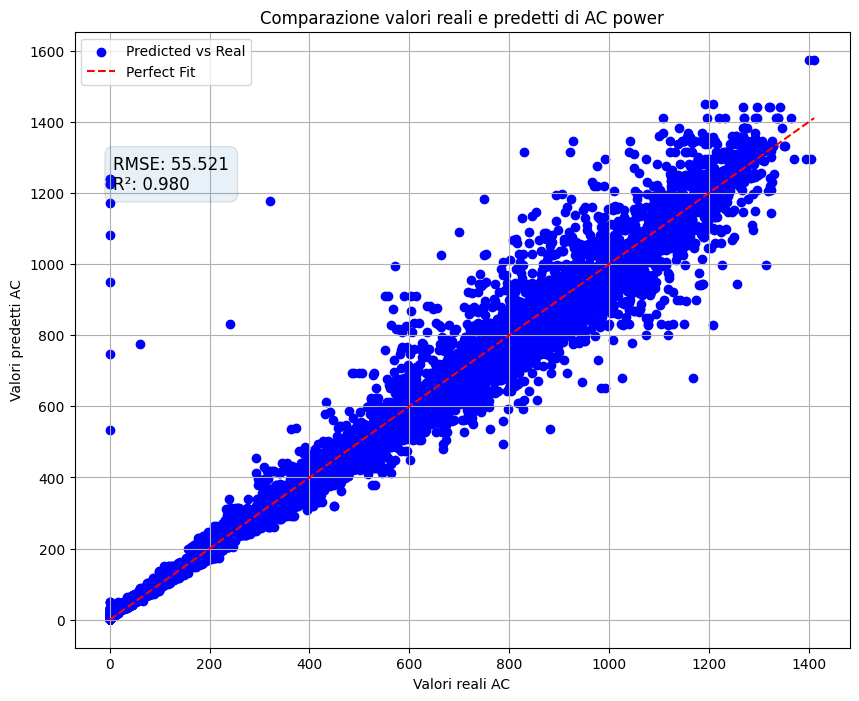

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Valori reali AC')
plt.ylabel('Valori predetti AC')
plt.title('Comparazione valori reali e predetti di AC power')
plt.legend()
plt.grid(True)
plt.show()

Faccio la feature importance, cioè voglio capire quelle che sono le feature più importanti che il modello considera per la predizione

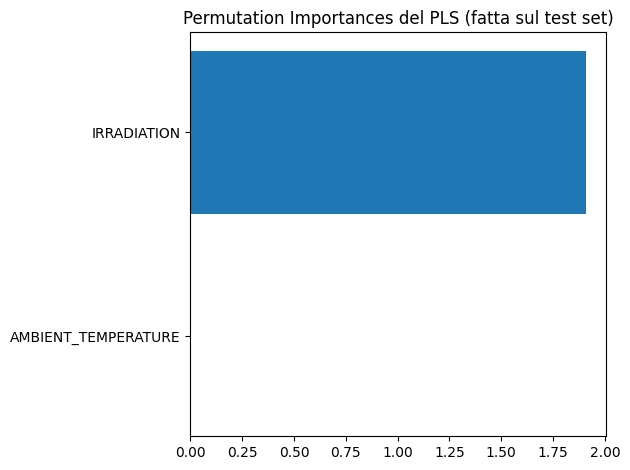

In [8]:
from sklearn.inspection import permutation_importance

#calcolo la feature importance con i test di permutazione
results = permutation_importance(pls, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del PLS (fatta sul test set)")
fig.tight_layout()
plt.show()

In [9]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9100
AMBIENT_TEMPERATURE: 0.0005


vedo in altro modo la bontà della predizione

In [ ]:
p1gd['DATE_TIME'] = pd.to_datetime(p1gd['DATE_TIME'], format='%d-%m-%Y %H:%M')

#prendo il risultato della predizione e ci creo un df per poi graficarlo
predictions = pls.predict(X_test)
predictions_df = pd.DataFrame(predictions, index=X_test.index, columns=['Predicted_AC'])


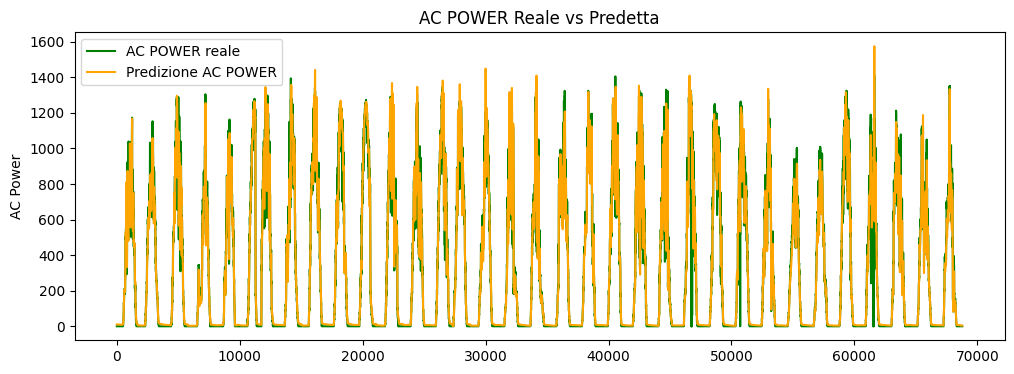

In [ ]:
#nel grafico confronto i valori della predizione con quelli reali
#uso i dati di ytest per i valori reali e di ypred per quelli derivati dal modello
plt.figure(figsize=(12, 4))
sns.lineplot(data=y_test, color='green', label='AC POWER reale') #basta y_test senza specificare la colonna perchè è unica visto che l'altra è un index
sns.lineplot(data=predictions_df['Predicted_AC'], color='orange', label='Predizione AC POWER')
plt.title('AC POWER Reale vs Predetta')
plt.ylabel('AC Power')
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
#unisco dati in unico df  con valori reali e predetti e calcolo errori assoluti e in %
merge_realPred = pd.concat([y_test, predictions_df],axis=1) #non mi serve usare il merge perchè tanto i concat li unisce sullo stesso index ed hanno stesso num di righe
merge_realPred['error%']= (merge_realPred['Predicted_AC']-merge_realPred['AC_POWER']) / merge_realPred['AC_POWER']
merge_realPred['error']=merge_realPred['Predicted_AC']-merge_realPred['AC_POWER']
merge_realPred.head()

AC_POWER  Predicted_AC    error%       error
48910  873.237500   1071.521060  0.227067  198.283560
45151    0.000000     10.579940       inf   10.579940
17954  613.785714    549.326957 -0.105018  -64.458757
51959    0.000000      5.928844       inf    5.928844
53225   98.628571     94.625906 -0.040583   -4.002666

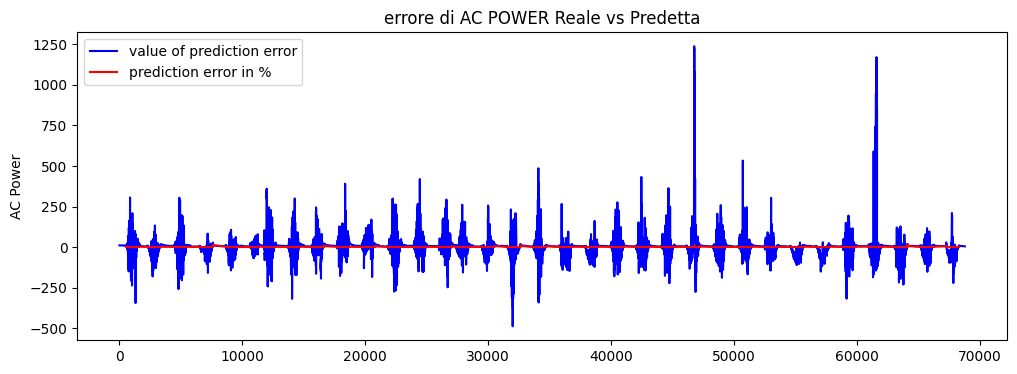

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merge_realPred['error'], color='blue', label='value of prediction error') #valore dell'errore
sns.lineplot(data=abs(merge_realPred['error%']), color='red', label='prediction error in %') #errore in %
plt.title('errore di AC POWER Reale vs Predetta')
plt.ylabel('AC Power')
plt.xlabel('') #sulle x ci sono dati in forma cumulativa
plt.legend()
plt.show()

vediamo meglio quello % con una scala più adatta alla visualizzazione

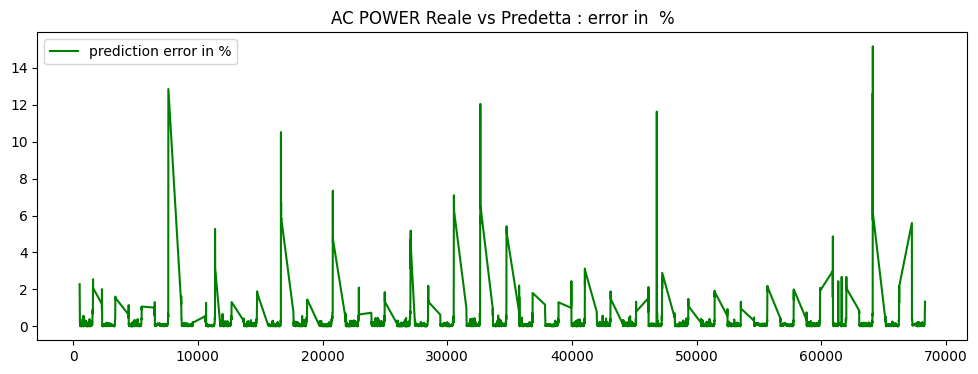

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=abs(merge_realPred['error%']), color='green', label='prediction error in %')
plt.title('AC POWER Reale vs Predetta : error in  %')
plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.show()

vediamo ora l'errore per mezzo di uno scatter plot

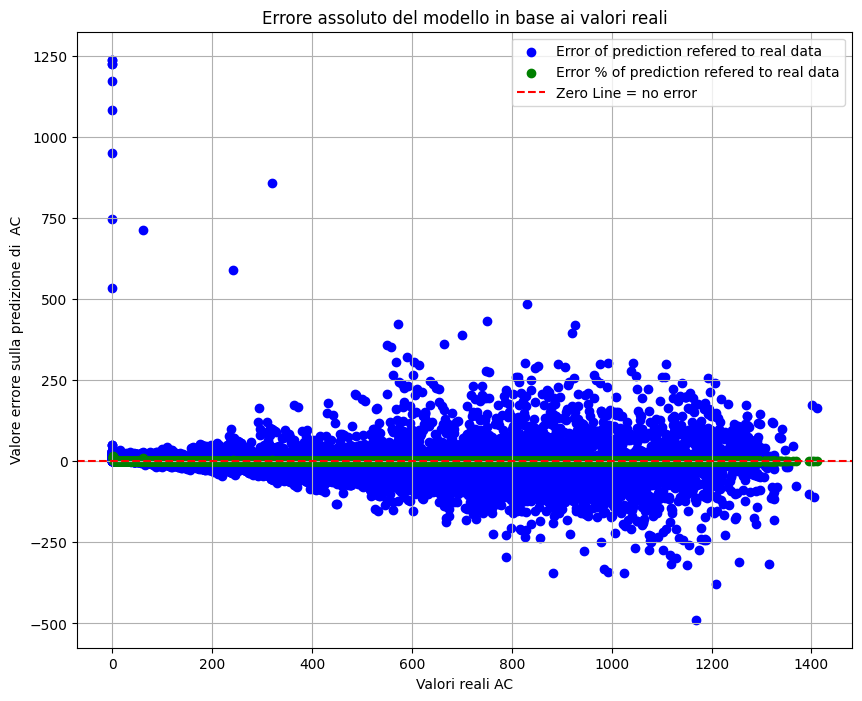

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test,merge_realPred['error'],  color='blue', label='Error of prediction refered to real data')
plt.scatter(y_test,abs(merge_realPred['error%']),  color='green', label='Error % of prediction refered to real data')
plt.axhline(0, color='red', linestyle='--', label='Zero Line = no error')

plt.xlabel('Valori reali AC')
plt.ylabel('Valore errore sulla predizione di  AC')
plt.title('Errore assoluto del modello in base ai valori reali')
plt.legend()
plt.grid(True)
plt.show()

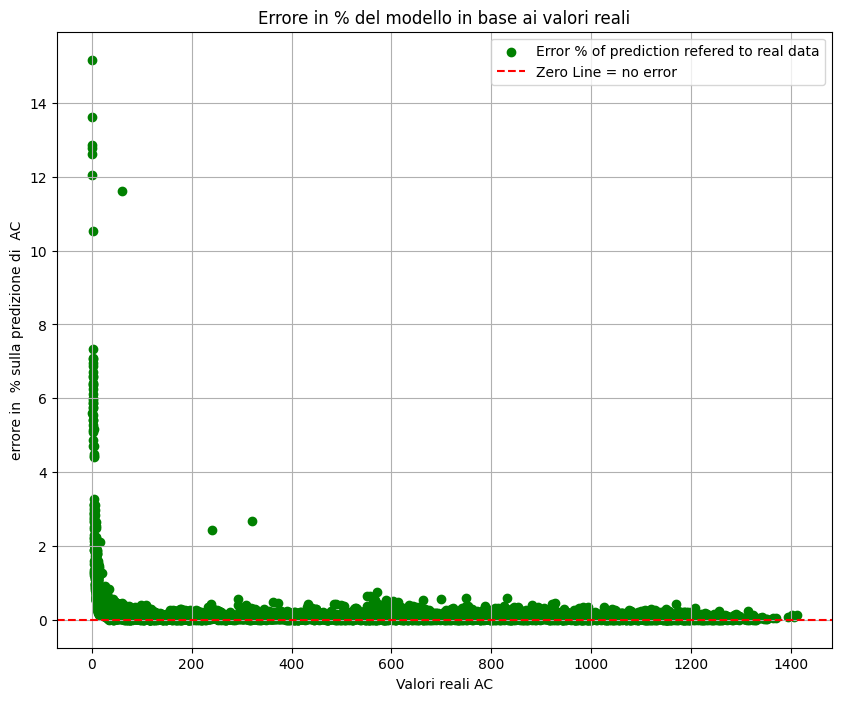

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test,abs(merge_realPred['error%']),  color='green', label='Error % of prediction refered to real data')
plt.axhline(0, color='red', linestyle='--', label='Zero Line = no error')

plt.xlabel('Valori reali AC')
plt.ylabel('errore in  % sulla predizione di  AC')
plt.title('Errore in % del modello in base ai valori reali')
plt.legend()
plt.grid(True)
plt.show()

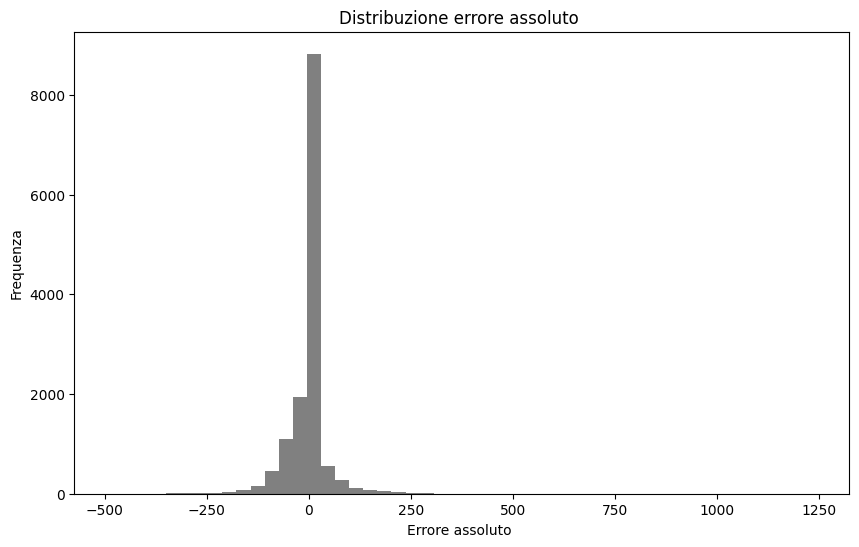

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(merge_realPred['error'], bins=50, color='gray')
#plt.axvline(tolerance, color='red', linestyle='dashed', linewidth=1) #tolleranza impostata
plt.xlabel('Errore assoluto ')
plt.ylabel('Frequenza')
plt.title('Distribuzione errore assoluto ')
plt.show()

Emerge che il modello fa fatica su valori molto bassi di AC Power, per il resto le prestazioni sono ottime

Modello di regressione lineare

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

lr_score = lr_model.score(X_test, y_test)
print(f"Score della regressione lineare: {lr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score della regressione lineare: 98.0023 %
RMSE: 55.5207429192813
R²: 0.9800229131753128


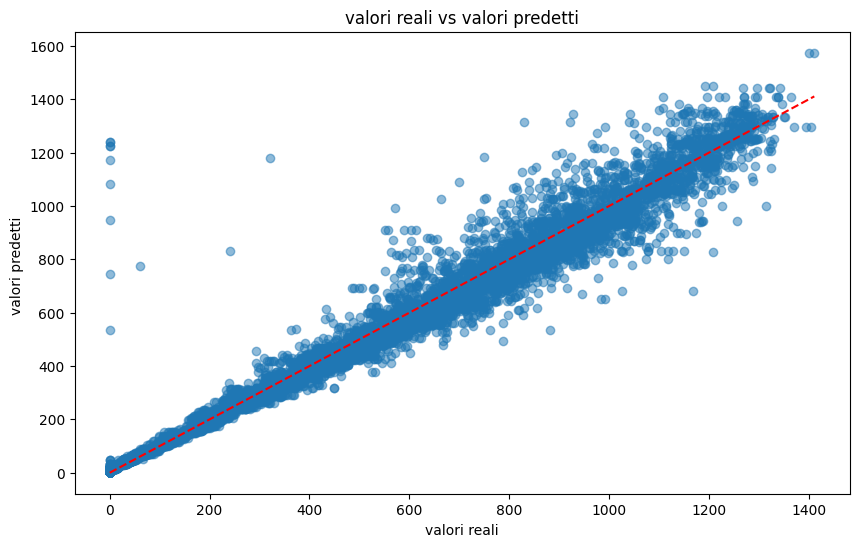

In [ ]:
#  plot per confronto valore reale e predetto

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # linea per la predizione pergetta
plt.xlabel('valori reali')
plt.ylabel('valori predetti ')
plt.title('valori reali vs valori predetti')
plt.show()

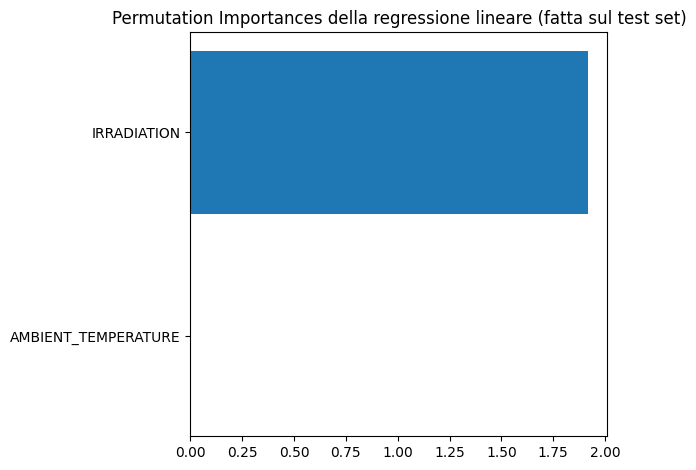

In [ ]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(lr_model, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances della regressione lineare (fatta sul test set)")
fig.tight_layout()
plt.show()

In [ ]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9154
AMBIENT_TEMPERATURE: 0.0005


vediamo e valutiamo la bontà del modello impostando una fascia di tolleranza : consideriamo buoni solo le predizioni che la rispettano, le altre le consideriamo come outlier, cioè predizioni errate in qunato si discostano troppo dal valore reale

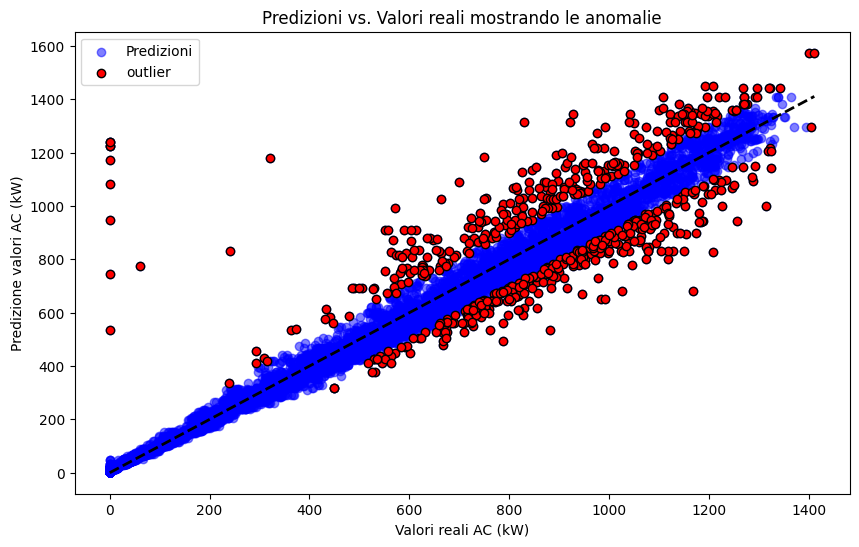

In [ ]:
#imposto una fascia di tolleranza per rilevare le anomalie
tolerance = 100
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali AC (kW)')
plt.ylabel('Predizione valori AC (kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

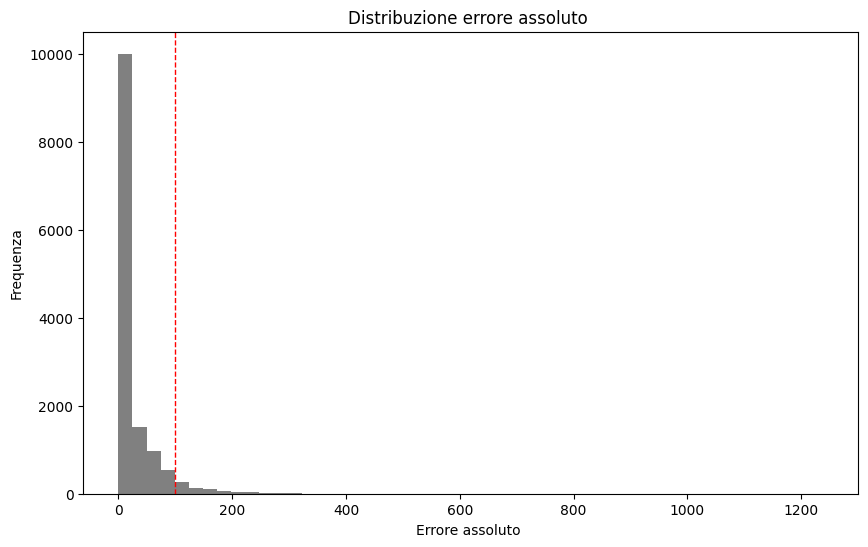

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='gray')
plt.axvline(tolerance, color='red', linestyle='dashed', linewidth=1) #tolleranza impostata
plt.xlabel('Errore assoluto ')
plt.ylabel('Frequenza')
plt.title('Distribuzione errore assoluto ')
plt.show()

KNN

In [10]:
from sklearn import neighbors

#mi serve per salvarmi i risultati in base al parametro k
score_list = []
n_neighbors_list = []

# uso il ciclo for per vedere il miglior valore del parametro per il modello
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Miglior risultato del knn è con parametro  {best_n_neighbor} e vale  {max(score_list)*100:.4f} %")

Miglior risultato del knn è con parametro  10 e vale  98.6496 %


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o')
plt.xlabel('numero di vicini')
plt.ylabel('R² Score')
plt.title('R² Score per differenti valori del parametro di vicini del  KNN')
plt.grid(True)

# Highlight the best n_neighbors
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
best_score = max(score_list)
plt.scatter([best_n_neighbor], [best_score], color='red', zorder=5)
plt.text(best_n_neighbor, best_score, f'miglior parametro: {best_n_neighbor}\nScore: {best_score*100:.4f}%',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

print(f"miglior risultato è {best_score*100:.4f} in corrispondenza di  {best_n_neighbor} come parametro %")

miglior risultato è 98.6496 in corrispondenza di  10 come parametro %


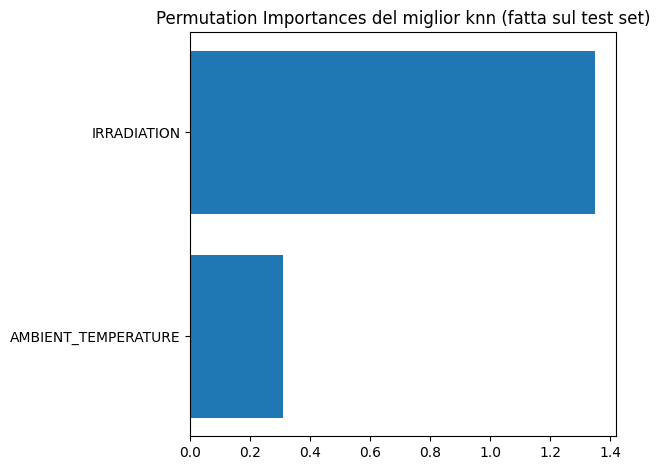

In [11]:
best_knn = neighbors.KNeighborsRegressor(n_neighbors=3)
best_knn.fit(X_train, y_train)

#calcolo la feature importance con i test di permutazione
results = permutation_importance(best_knn, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del miglior knn (fatta sul test set)")
fig.tight_layout()
plt.show()

In [12]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.3513
AMBIENT_TEMPERATURE: 0.3080


Alberi decisionali

In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

dtr_score = dtr.score(X_test, y_test)
print(f"Score dell'albero: {dtr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score dell'albero: 98.6513 %
RMSE: 45.61855654934665
R²: 0.9865133310171954


In [ ]:
#stampo la feature importance che per gli alberi è una proprietà che posso ricavare senza test di permutazione
plt.figure(figsize=(15,12))
pd.Series(dtr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance dell albero decisionale è  ', size=16)

Text(0.5, 1.0, ' feautures importance dell albero decisionale è  ')

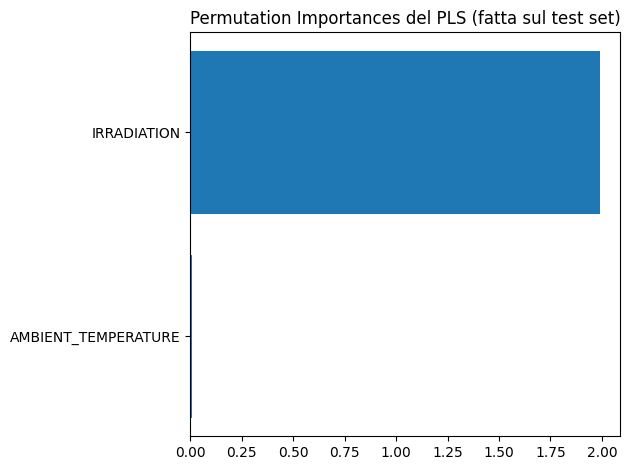

In [15]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(dtr, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del dtr (fatta sul test set)")
fig.tight_layout()
plt.show()

In [16]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9884
AMBIENT_TEMPERATURE: 0.0078


Random forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rfr_score = rfr.score(X_test, y_test)
print(f"Score del random forest: {rfr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")



Score del random forest: 98.6492 %
RMSE: 45.65495094842439
R²: 0.9864918031546046


In [ ]:
plt.figure(figsize=(15,12))
pd.Series(rfr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest  è  ', size=16)

Text(0.5, 1.0, ' feautures importance del random forest  è  ')

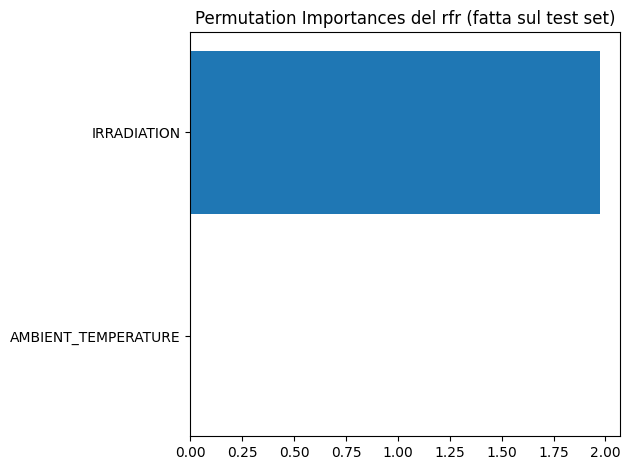

In [19]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(rfr, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del rfr (fatta sul test set)")
fig.tight_layout()
plt.show()

In [20]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9718
AMBIENT_TEMPERATURE: 0.0046


Modello Gradient Boost

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# dichiarazione e trainingraining del modello
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

# valutazione del  modello
y_pred = gb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
gb_score = gb_regressor.score(X_test, y_test)


print(f"Score del gradient boost: {gb_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Score del gradient boost: 98.4191 %
RMSE: 49.38951899856551
R²: 0.9841914800046883


Text(0.5, 1.0, ' feautures importance del gradient boost  è  ')

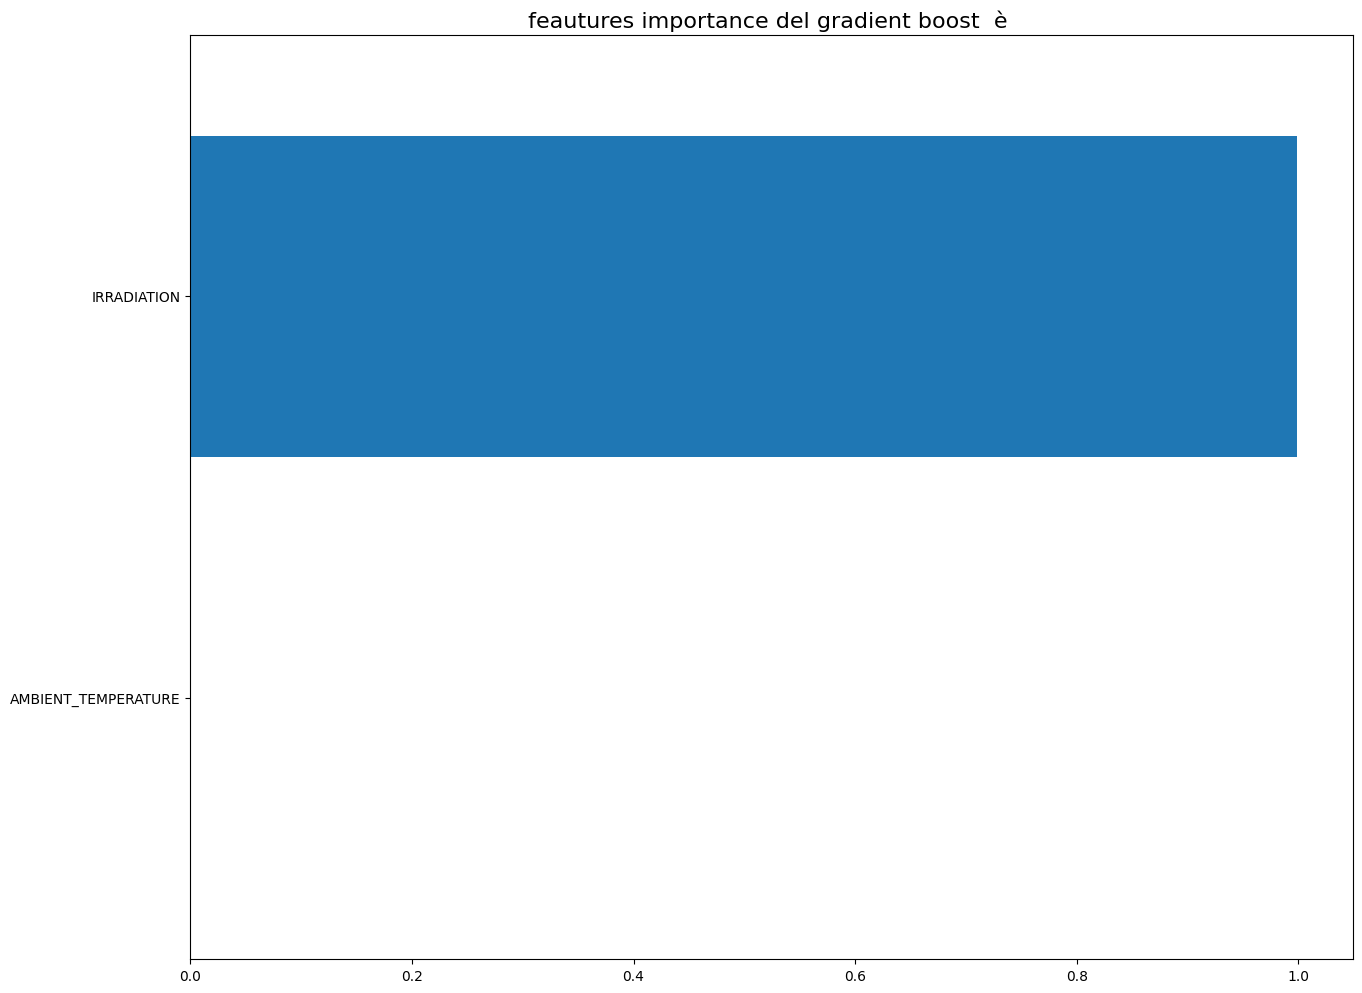

In [ ]:
plt.figure(figsize=(15,12))
pd.Series(gb_regressor.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del gradient boost  è  ', size=16)

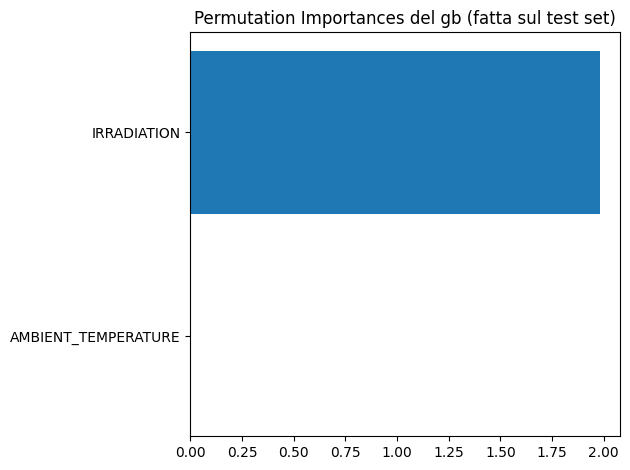

In [23]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(gb_regressor, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del gb (fatta sul test set)")
fig.tight_layout()
plt.show()

In [24]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9798
AMBIENT_TEMPERATURE: 0.0012


Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model

br = linear_model.BayesianRidge()
br.fit(X_train,y_train)

y_pred = br.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

br_score =br.score(X_test, y_test)
print(f"Score bayesian ridge regression: {br_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score bayesian ridge regression: 98.0023 %
RMSE: 55.52075385386185
R²: 0.9800229053065028


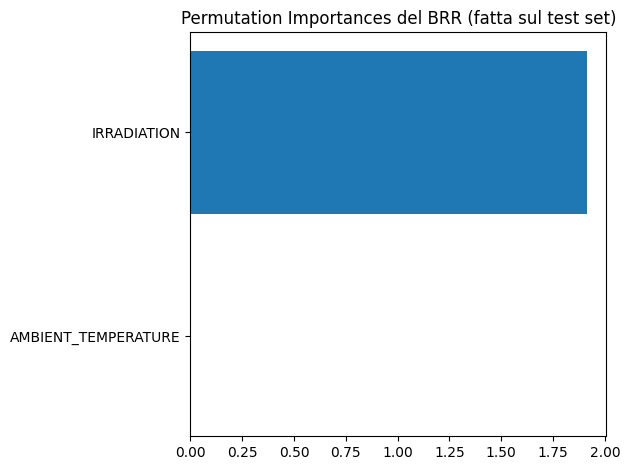

In [ ]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(br, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del BRR (fatta sul test set)")
fig.tight_layout()
plt.show()

In [ ]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

IRRADIATION: 1.9113
AMBIENT_TEMPERATURE: 0.0005


In [ ]:
tolerance = 100
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali AC (kW)')
plt.ylabel('Predizione valori AC (kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

Comparazione dei modelli

Dai modelli precedenti prendiamo i risultati e li compariamo con un grafico

In [ ]:
models = ['PLSRegressor', 'LinearRegressor','KNN','DecisionTree', 'RandomForest','GradientBoost','BRR']

# scores corrispettivi dei modelli precedentemente utilizzati ed elencati
scores = [98.00, 98.01,98.64, 98.65,98.64,98.41,98.00]

# Creazione di un bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue','blue','darkblue'])
plt.ylim(0, 100)  # metto asse y settato tra 0 e 100
#plt.title('Performance del modello')
plt.xlabel('Modello')
plt.ylabel('Score in %')

# metto gli socres in alto sopra le barre del grafico
for i, score in enumerate(scores):
    plt.text(i, score + 1, f"{score:.2f}%", ha='center', va='bottom')

# mostra il grafico
plt.tight_layout()
plt.show()